In [3]:
from __future__ import division

# classic
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os,sys
import scipy.stats

# some nice formating things
plt.rc('font', family='serif', size=25)
plt.rc('legend', fontsize=12)
plt.rc('axes', labelsize=25)
plt.rc('axes', titlesize=25)

## Load the HESE neutrino event sample

In [4]:
def loadEvents(filename):
    ID,E,EerrMin,EerrMax,DEC,RA,AngEr = np.loadtxt(filename,comments='#',usecols=(0,1,2,3,5,6,7), unpack =True)
    topo = np.loadtxt(filename,comments='#',usecols=[8], unpack =True, dtype = 'str')
    
    array = np.recarray(len(E), [('topology', topo.dtype), # track or shower
                                 ('energy', float), # deposited energy in TeV
                                 ('energy_error', float), # error on deposited energy in TeV
                                 ('RA', float),  # position in right asension (radians)
                                 ('DEC', float), # position in declination (radians)
                                 ('ID', int), # event ID
                                 ('angular_error', float)]) # angular error on position in radians
    array.ID[:] = ID
    array.topology[:] = topo
    array.energy[:], array.energy_error[:] = E, np.array([EerrMin, EerrMax]).max(axis=0)
    array.RA[:], array.DEC[:], array.angular_error[:] = np.radians(RA), np.radians(DEC), np.radians(AngEr)
    
    return array

HESEEvents=loadEvents("catalogs/eventsummary_4years.txt")

## Display information for all HESE events

In [5]:
print(HESEEvents.dtype.names)
print(HESEEvents)

('topology', 'energy', 'energy_error', 'RA', 'DEC', 'ID', 'angular_error')
[('Shower',   47.6,   6.5, 0.6143559 , -0.03141593,  1, 0.28448867)
 ('Shower',  117. ,  15.4, 4.93230047, -0.48869219,  2, 0.44331363)
 ('Track',   78.7,  10.8, 2.23227611, -0.54454273,  3, 0.02443461)
 ('Shower',  165.4,  19.8, 2.95833308, -0.89360858,  4, 0.12391838)
 ('Track',   71.4,   9. , 1.93033415, -0.00698132,  5, 0.02094395)
 ('Shower',   28.4,   2.7, 2.33699587, -0.47472956,  6, 0.17104227)
 ('Shower',   34.3,   3.5, 0.27227136, -0.78714349,  7, 0.42062435)
 ('Track',   32.6,  10.3, 3.18348056, -0.3700098 ,  8, 0.02268928)
 ('Shower',   63.2,   7.1, 2.64068316,  0.58643063,  9, 0.28797933)
 ('Shower',   97.2,  10.4, 0.08726646, -0.5131268 , 10, 0.14137167)
 ('Shower',   88.4,  12.5, 2.71049633, -0.1553343 , 11, 0.29146999)
 ('Shower',  104.1,  12.5, 5.16791992, -0.92153385, 12, 0.17104227)
 ('Track',  252.7,  25.9, 1.18507856,  0.70336769, 13, 0.02094395)
 ('Shower', 1040.7, 131.6, 4.63559449, -0.486

## Load a catalog

In [8]:
def loadCatalog(filename, log=True):
    RA,DEC = np.loadtxt(filename,comments='#',usecols=(1,2), unpack =True)
    NAMES = np.loadtxt(filename,comments='#',usecols=[0], unpack =True, dtype = 'str')
    
    array = np.recarray(len(DEC), [('name', NAMES.dtype), ('RA', float), ('DEC', float)])
    array.name[:] = NAMES
    array.DEC[:], array.RA[:] = np.radians(DEC), np.radians(RA)
    
    if log:
        print("catalog: %s" % filename)
        print("ra  range [%.2f, %.2f] deg" % (min(RA), max(RA)))
        print("dec range [%.2f, %.2f] deg" % (min(DEC), max(DEC)))

    return array

catalog=loadCatalog("catalogs/HAWC_Cat.txt")

catalog: catalogs/HAWC_Cat.txt
ra  range [83.63, 307.93] deg
dec range [-19.04, 41.76] deg


## Show catalog contents

In [9]:
print(catalog.dtype.names)
print(catalog)

('name', 'RA', 'DEC')
[('2HWC_J0534+220', 1.45961885,  0.3843215 )
 ('2HWC_J0631+169', 1.71042267,  0.29670597)
 ('2HWC_J0635+180', 1.7249089 ,  0.31503193)
 ('2HWC_J0700+143', 1.83469011,  0.24993115)
 ('2HWC_J0819+157', 2.1813125 ,  0.27558749)
 ('2HWC_J1040+308', 2.79636653,  0.53878314)
 ('2HWC_J1104+381', 2.89916642,  0.66601764)
 ('2HWC_J1309-054', 3.44370915, -0.09581858)
 ('2HWC_J1653+397', 4.42406059,  0.69446651)
 ('2HWC_J1809-190', 4.75532408, -0.33231069)
 ('2HWC_J1812-126', 4.76841405, -0.22060962)
 ('2HWC_J1814-173', 4.77382457, -0.30211649)
 ('2HWC_J1819-150*', 4.79668838, -0.26284659)
 ('2HWC_J1825-134', 4.82513725, -0.23387412)
 ('2HWC_J1829+070', 4.84049615,  0.12269665)
 ('2HWC_J1831-098', 4.84974639, -0.1727876 )
 ('2HWC_J1837-065', 4.8757518 , -0.11484266)
 ('2HWC_J1844-032', 4.90559693, -0.0567232 )
 ('2HWC_J1847-018', 4.92095583, -0.03193953)
 ('2HWC_J1849+001', 4.92863527,  0.00191986)
 ('2HWC_J1852+013*', 4.93945632,  0.02408554)
 ('2HWC_J1857+027', 4.96249466,

## Construct probability density for signal event given a source

In [8]:
def sph_dot(th1,th2,phi1,phi2):
    return np.sin(th1)*np.sin(th2)*np.cos(phi1-phi2) + np.cos(th1)*np.cos(th2)

# Implementation of the kent distribution
def event_angular_distribution(event,source):
    kappa = 1./(event.angular_error)**2
    log_dist = np.log(kappa) - np.log(2*np.pi) - kappa + kappa*sph_dot(np.pi/2-event.DEC, np.pi/2-source.DEC, event.RA, source.RA)
    return np.exp(log_dist)

def S(event, source):
    return event_angular_distribution(event, source)


## Compute spatial probability density for signal from the source <br>2HWC J2031+415 using the location of the first HESE event

the answer shound be 1.02e-5

## Constructing the likelihood/test statistic

We will use the following likelihood definition
\begin{equation}
\mathcal{L}(ns) = \prod_{i = 1}^N\left[ \frac{ns}{N} S_{i,c} + (1-\frac{ns}{N}) B \right], \\ B = 1/4\pi, \\ S_{i,c} = S(event_i, source_c)
\end{equation}
where $ns = 0$ is the null hypothesis and is bounded to be between zero and N, $S$ accounts for the event angular distribution, $B$ is the background distribution which we will assume isotropic ($1/4\pi$). N is the total number of events. Go ahead and construct the $\log\mathcal{L}$.

### Test Statistic definition

We are going to use the following test statistic (TS) definition<br><br>
\begin{equation}
\mathcal{TS} = 2 * \log( \mathcal{L}(ns) / \mathcal{L}(ns=0) )
\end{equation}<br>
\begin{equation}
\mathcal{TS} = 2 * \sum_{i = 1}^N \log\left[ \frac{ns}{N} \frac{S_{i,c}}{B} + (1-\frac{ns}{N}) \right]
\end{equation}

## Step 1: Compute the first term in the sum of TS using ns = 1 and the source 2HWC J1814-173

hint - compute the natural logarithm of the stuff inside the square brackets for the first HESE event and the catalog source with index 11. The answer should be -0.02

## Step 2: Compute TS for ns = 1 by summing over all terms using  2HWC J1814-173

The answer should be 0.96

## Step 3: Maximize TS by scanning over values of ns between 0 and N to find the largest TS

hint - ns doesn't have to be an integer

## Step 4: Now find the maximum TS for the entire catalog

To test the entire catalog, modify the likelihood to average over the likelihood of each source:
\begin{equation}
\mathcal{L}(ns) = \prod_{i = 1}^N\left[ \frac{1}{M}\sum_{c=1}^M \frac{ns}{N} S_{i,c} + (1-\frac{ns}{N}) B \right], \\ B = 1/4\pi, \\ S_{i,c} = S(event_i, source_c)
\end{equation}
where $ns = 0$ is the null hypothesis and is bounded to be between zero and N, $S$ accounts for the event angular distribution, $B$ is the background distribution which we will assume isotropic ($1/4\pi$). N is the number of events and M is the number of sources in the catalog.

## Step 5: Collect the results of maximum TS and the corresponding ns for each catalog here

## Step 6: Plot the locations of events and sources in the catalog to see if you can understand why some catalogs give larger values of TS

## Bonus: Calculate a p-value for one of the catalog TS above

Hint: Many times in the neutrino sources group, we use data-driven background estimation. This means we obtain an estimate of the what the background looks like from the data itself, rather than by simulating our detector. We can create a single set of events that describes the "background" case by simply scrambling our event data in right ascension. This means we will take the right ascension values for each of our events, and replace them with a new random value between 0 and 2 $\pi$. In principle, we would also have to scramble in declination as well, but since our detector is located at the south pole, and has similar response for events of the same declination, we can get away with only scrambling in right ascension.

Warning: This section may require a lot of computing time, since you'll need to calculate a TS for each of background maps. You might consider moving that code into a script you can put on the npx cluster

In [34]:
#generates 1 map of data, but with the right ascension values randomized
def scramble_ra(events):
    scrambled_evts = np.copy(events)
    ralist = scrambled_evts['RA']
    random_ra = np.random.uniform(0,2.*np.pi, size=len(events))
    scrambled_evts['RA'] = random_ra
    return(scrambled_evts)


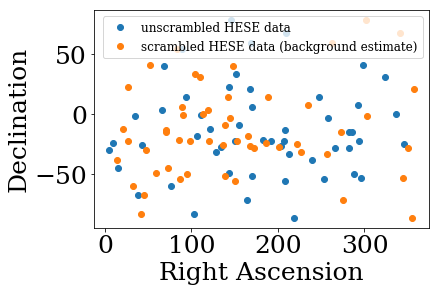

In [43]:
#Some test code to demonstrate this function
scrambled_evts = scramble_ra(HESEEvents)

#plot the unscrambled data
hese_ra = HESEEvents['RA']
hese_dec = HESEEvents['DEC']
plt.plot(np.degrees(hese_ra), np.degrees(hese_dec), 'o', color='tab:blue', label='unscrambled HESE data')

scram_ra = scrambled_evts['RA']
scram_dec = scrambled_evts['DEC']
plt.plot(np.degrees(scram_ra), np.degrees(scram_dec), 'o', color='tab:orange', label='scrambled HESE data (background estimate)')

plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.legend(loc=0)

In [ ]:
#A pre-generated set of 1010 trials from running on the cluster
bgtsarr = np.load('data/bg_ts_arr.npy')
print(bgtsarr, len(bgtsarr))

## Final Notes

Here we've gone through a very basic construction that only focuses on the spatial difference between signal and background. However, one can also include spectral information to provide further power to the technique in cases where the energy distribution of events differs between signal and background. You can read more about that here https://arxiv.org/pdf/0801.1604.pdf. <br><br> Also, keep in mind this example is a learning exercise. We encourage you to use IceCube's established tool called <a href="https://wiki.icecube.wisc.edu/index.php/SkyLab">SkyLab</a> for point source analysis within the collaboration rather than writing your own code from scratch. Using a common package saves time and headaches for everyone!